<a href="https://colab.research.google.com/github/DaramG-star/TIL/blob/master/%EB%B6%84%ED%95%A0_%EC%A0%95%EB%B3%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분할 정복

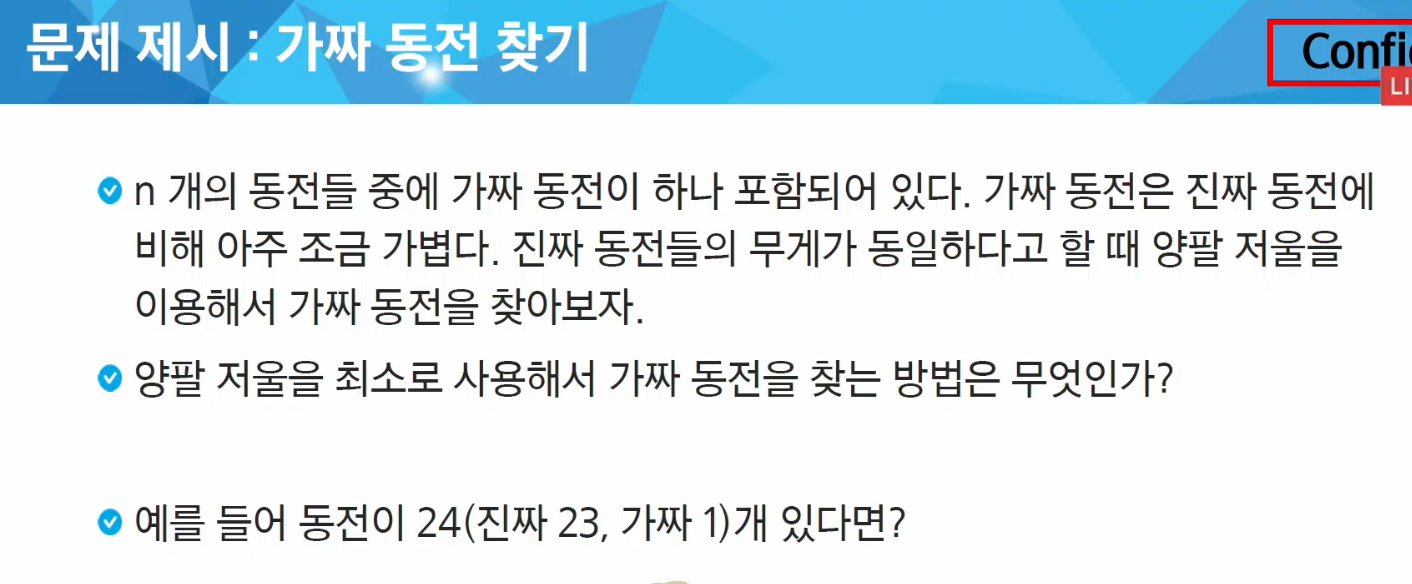

#### 1) 쉽게 떠올릴 수 있는 방법 - 모두 다 달아보고 비교

#### 2) 절반씩 올려서 가벼운 저울에 있는 동전을 달아보기

1. 나누어서 각각 해결

2. 여러 개로 분할

3. 제일 쉬운 분할은 '절반'


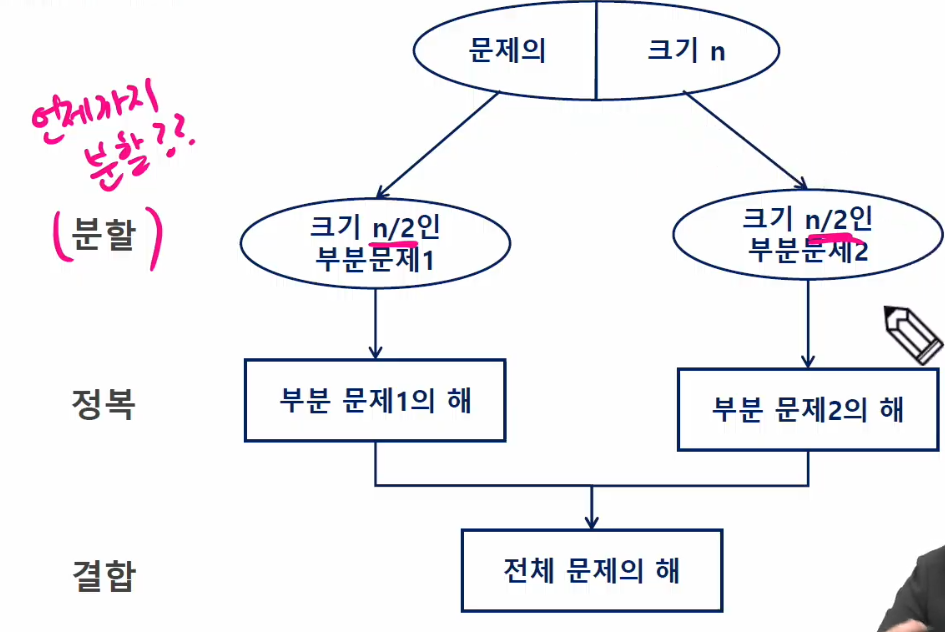

**더 이상 나눌 수 없거나, 나눌 필요가 없을 때 까지** 분할

In [ ]:
# 반으로 나눈다고 가정
def recur():
    left = recur(left에 필요한 변수)
    right = recur(right에 필요한 변수)

    result = left + right # 병합

#### - 자연수 C의 n제곱 값을 구하는 함수를 구현해보자

제곱을 반으로 나누기
ex) $$2^{13} = 2^{6} \times  2^{7} $$

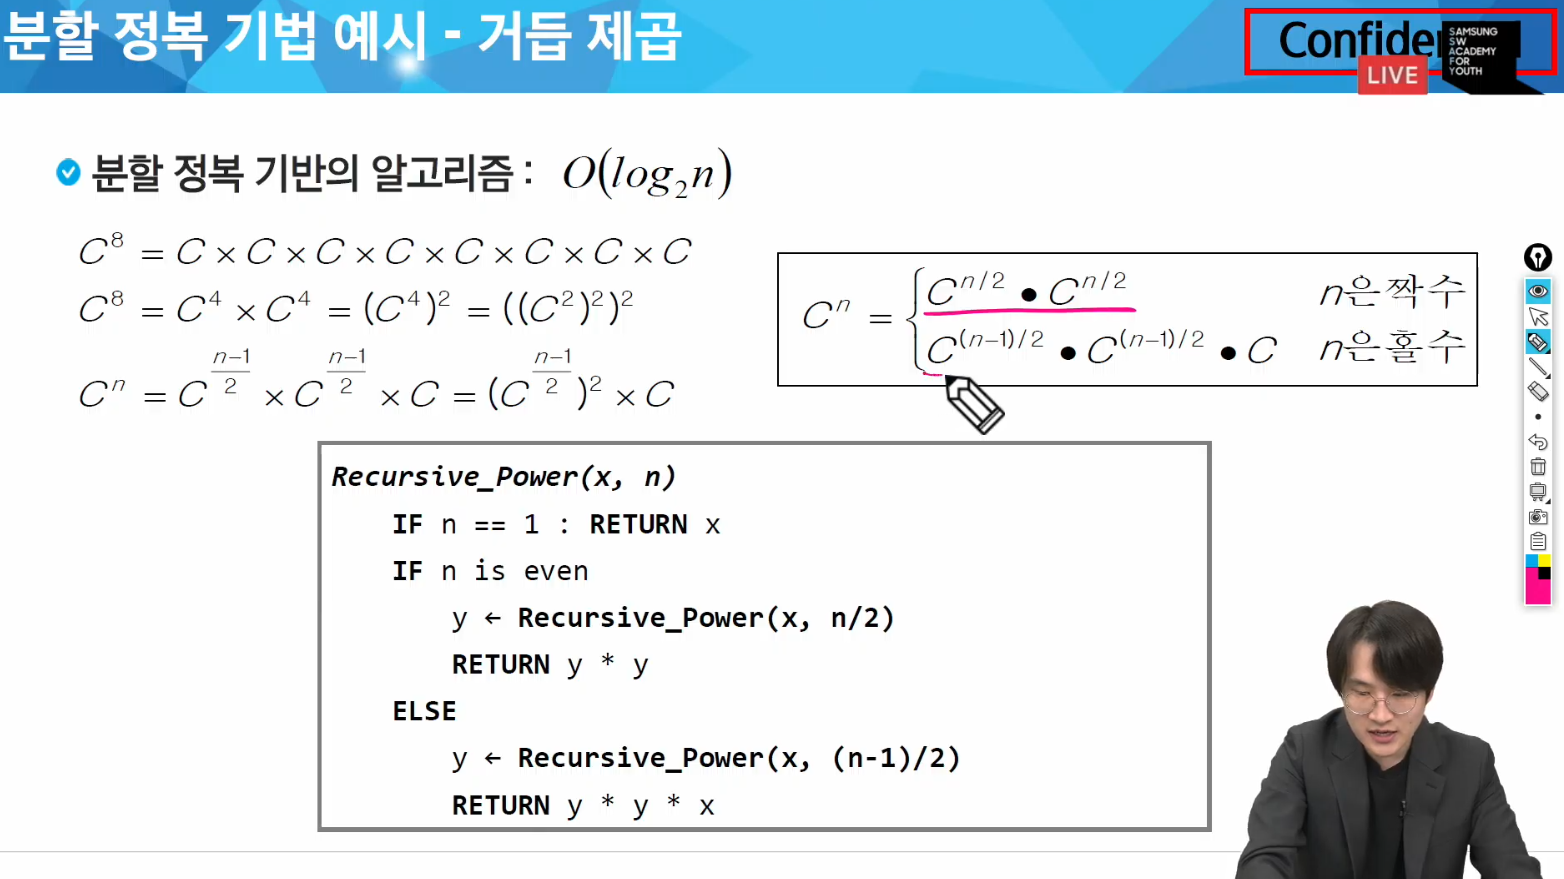

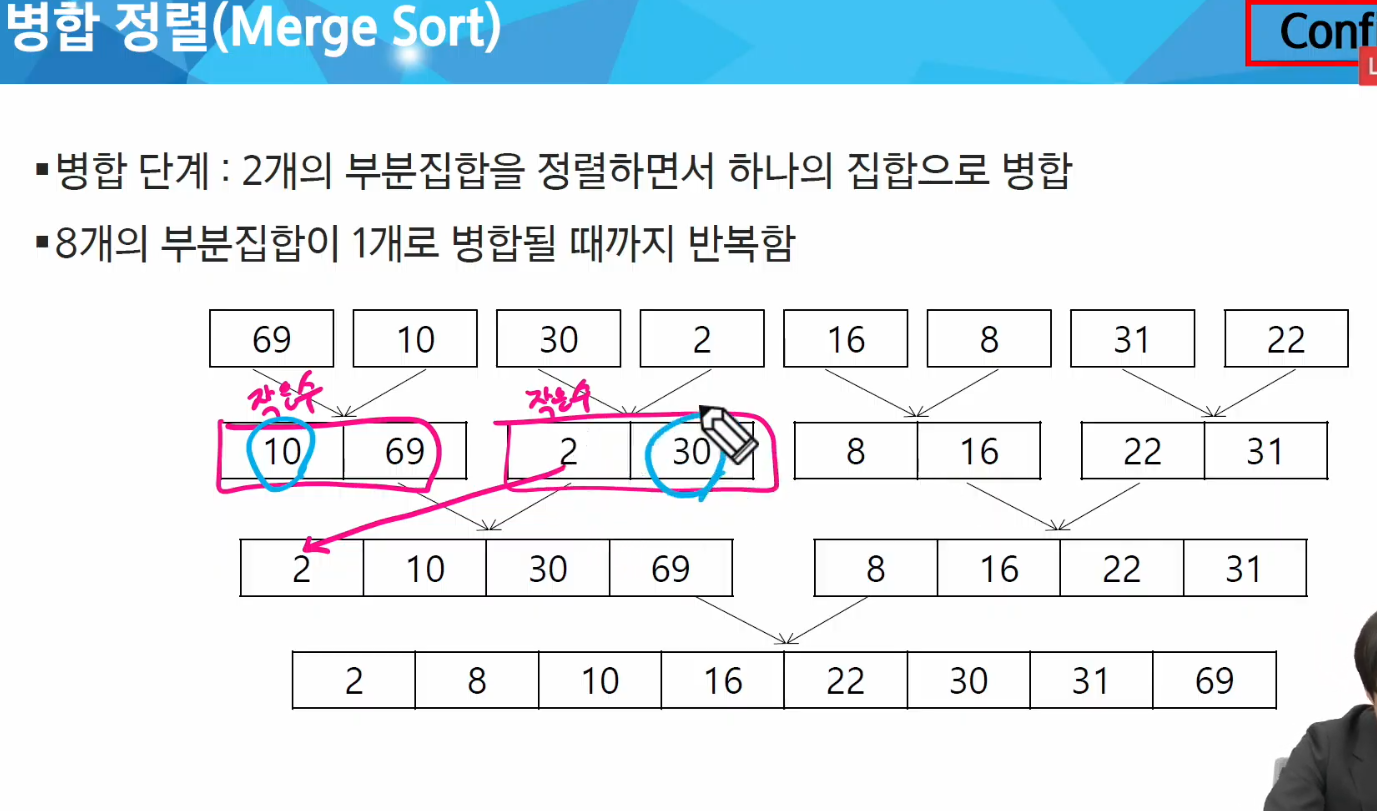

In [3]:
# 1. 분할: 리스트의 길이가 1일 때까지 분할
# 2. 정복: 리스트의 길이가 1이 되면 자동으로 정렬됨
# 3. 병합
#   - 왼쪽, 오른쪽 리스트 중
#       작은 원소부터 정답 리스트에 추가하면서 진행
def merge(left, right):
    # 두 리스트를 병합한 결과 리스트
    result = [0] * (len(left) + len(right))
    l = r = 0

    # 두 리스트에서 비교할 대상이 남아있을 때 까지 반복
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            result[l + r] = left[l]
            l += 1
        else:
            result[l + r] = right[r]
            r += 1

    # 왼쪽 리스트에 남은 데이터들을 모두 result 에 추가
    while l < len(left):
        result[l + r] = left[l]
        l += 1

    # 오른쪽 리스트에 남은 데이터들을 모두 result 에 추가
    while r < len(right):
        result[l + r] = right[r]
        r += 1

    return result


def merge_sort(li):
    if len(li) == 1:
        return li

    # 1. 절반 씩 분할
    mid = len(li) // 2
    left = li[:mid]    # 리스트의 앞쪽 절반
    right = li[mid:]   # 리스트의 뒤쪽 절반

    left_list = merge_sort(left)
    right_list = merge_sort(right)

    # print(left_list, right_list)
    # 분할이 완료되면
    # 2. 병합
    merged_list = merge(left_list, right_list)
    return merged_list


arr = [69, 10, 30, 2, 16, 8, 31, 22]
sorted_arr = merge_sort(arr)
print(sorted_arr)


[2, 8, 10, 16, 22, 30, 31, 69]


## 퀵정렬

- 주어진 배열을 두 개로 분할하고, 각각을 정렬한다.

- 다른 점 1: 병합 정렬은 그냥 두 부분으로 나누는 반면에, 퀵 정렬은 분할할 때, 기준 아이템 중심으로 분할한다.

    - 기준보다 작은 것은 왼편, 큰 것은 오른편에 위치시킨다.

- 다른 점 2: 각 부분 정렬이 끝난 후, 병합정렬은 병합이란 후처리 작업이 필요하나, 퀵 정렬은 필요로 하지 않는다.

퀵 정렬의 장점 : 평균적인 시간복잡도 O($nlogn$)속도라는 빠른 속도로 정렬이 되는 Sort이다.

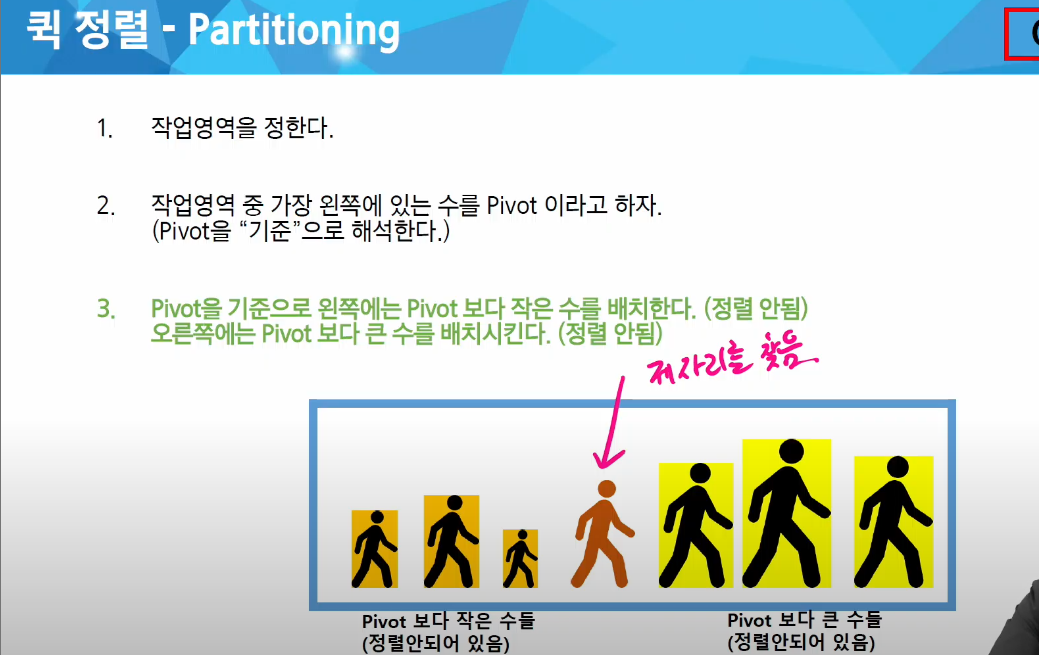

### 파티셔닝을 반복하여 하는 QuickSort

In [5]:
#피벗 : 제일 왼쪽 요소
def partitioning(left, right):
    pivot = arr[left]

    i = left + 1
    j = right

    while i <= j:
        #i = 큰 값을 검색하면서 오른쪽으로 진행
        while i<= j and arr[i] <= pivot:
            i += 1
        #j = 작은 값을 검색하면서 왼쪽으로 진행
        while i <= j and arr[j] >= pivot:
            j -= 1

        if i < j:
            arr[i], arr[j] = arr[j], arr[i]

    # pivot 위치를 확정시켜주기 (j와 바꾸기)
    arr[left], arr[j] = arr[j], arr[left]
    return j

#left, right : 작업 범위
def quick_sort(left, right):
    if left < right:
        # pivot 기준으로 정렬시킨다.
        pivot = partitioning(left, right)
        # 왼쪽 진행
        quick_sort(left, pivot - 1)
        # 오른쪽 진행
        quick_sort(pivot + 1, right)


arr = [3, 2, 4, 6, 9, 1, 8, 7, 5]
quick_sort(0, len(arr) - 1)
print(arr)


[1, 2, 3, 4, 5, 6, 7, 8, 9]


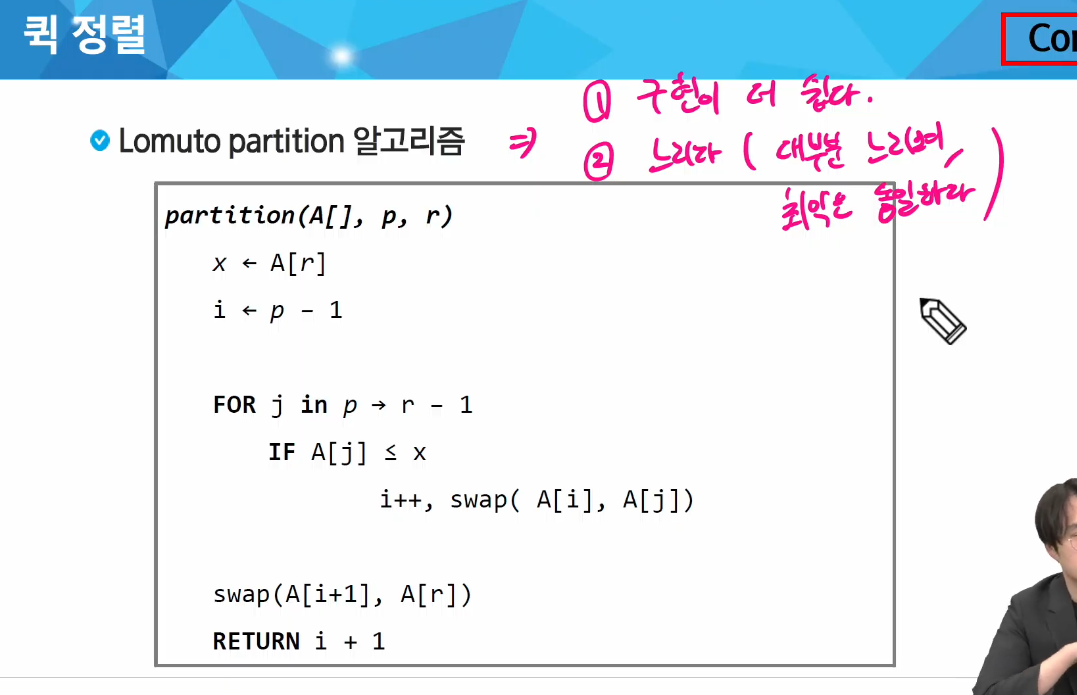 구현이 쉬운만큼 느리다

#### - 역순 정렬이 되어있을 때 최악의 성능 or pivot 설정 잘못했을 때

#### 호어 파티션 : pivot 기준, i, j를 좌우 끝부터 가운데로 이동

#### 로무토 파티션 : pivot을 제일 우측, i, j를 왼쪽에서 같이 이동

## 이진 검색

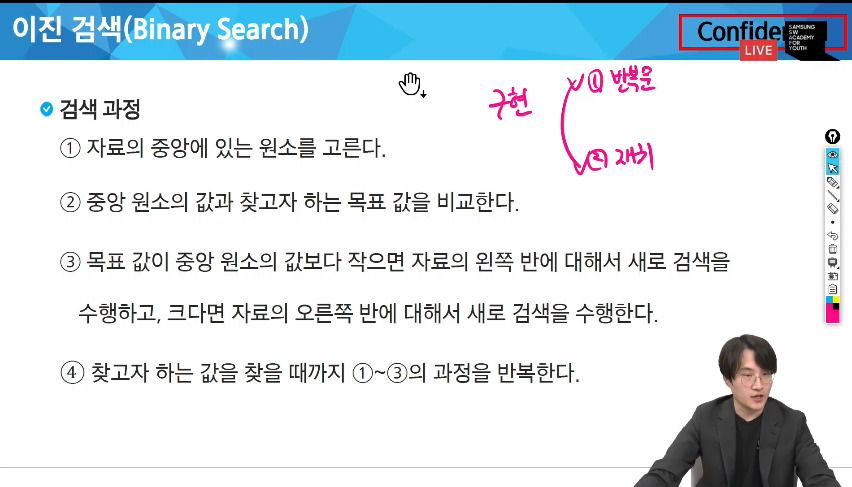

In [9]:
# 반복문
def binary_search(target):
    left = 0
    right = len(arr) - 1
    cnt = 0

    while left <= right:
        mid = (left + right) // 2
        cnt += 1

        if arr[mid] == target:
            return mid, cnt      #mid index에서 검색 완료!

        elif arr[mid] < target:
            right = mid - 1

        else:
            left = mid + 1

    return -1, cnt

arr = [4, 2, 9, 7, 11, 23, 19]
# 이진 검색은 항상 정렬된 데이터에 적용해야 한다!!
arr.sort()

print(f'9 - {binary_search(9)}')

9 - (3, 1)


In [11]:
# 재귀
def binary_search(left, right, target):
    if left > right:
        return -1

    mid = (left + right) // 2

    if target == arr[mid]:
        return mid

    if target < arr[mid]:
        return binary_search(left, mid -1, target)

    # 오른쪽을 봐야한다
    else:
        return binary_search(mid+1, right, target)

arr = [4, 2, 9, 7, 11, 23, 19]
# 이진 검색은 항상 정렬된 데이터에 적용해야 한다!!
arr.sort()

print(f'9 - {binary_search(0, len(arr) - 1, 9)}')

9 - 3


Lower Bound, Upper Bound 키워드 검색